In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import torch
from evo.dataset import FastaDataset
from plaid.datasets import MetadataParser, NUM_FUNCTION_CLASSES, NUM_ORGANISM_CLASSES
import numpy as np

val_fasta = '/data/lux70/data/pfam/val.fasta'
train_fasta = '/data/lux70/data/pfam/train.fasta'

ds = FastaDataset(val_fasta)
parser = MetadataParser()

100%|██████████| 1.56G/1.56G [00:06<00:00, 247MB/s]
100%|██████████| 1.56G/1.56G [00:10<00:00, 154MB/s]


## Parse FASTA to DataFrame

In [31]:
indices = np.arange(len(ds))[np.random.rand(len(ds)) < 0.0005]
print(indices.shape)

(4274,)


In [32]:
all_sequences = []

from tqdm.auto import trange, tqdm
import math

for i in indices:
    header, sequence = ds[i]
    if len(sequence) < 512:
        all_sequences.append(sequence)

print(len(all_sequences))

4220


In [40]:
lengths = [len(s) for s in all_sequences]

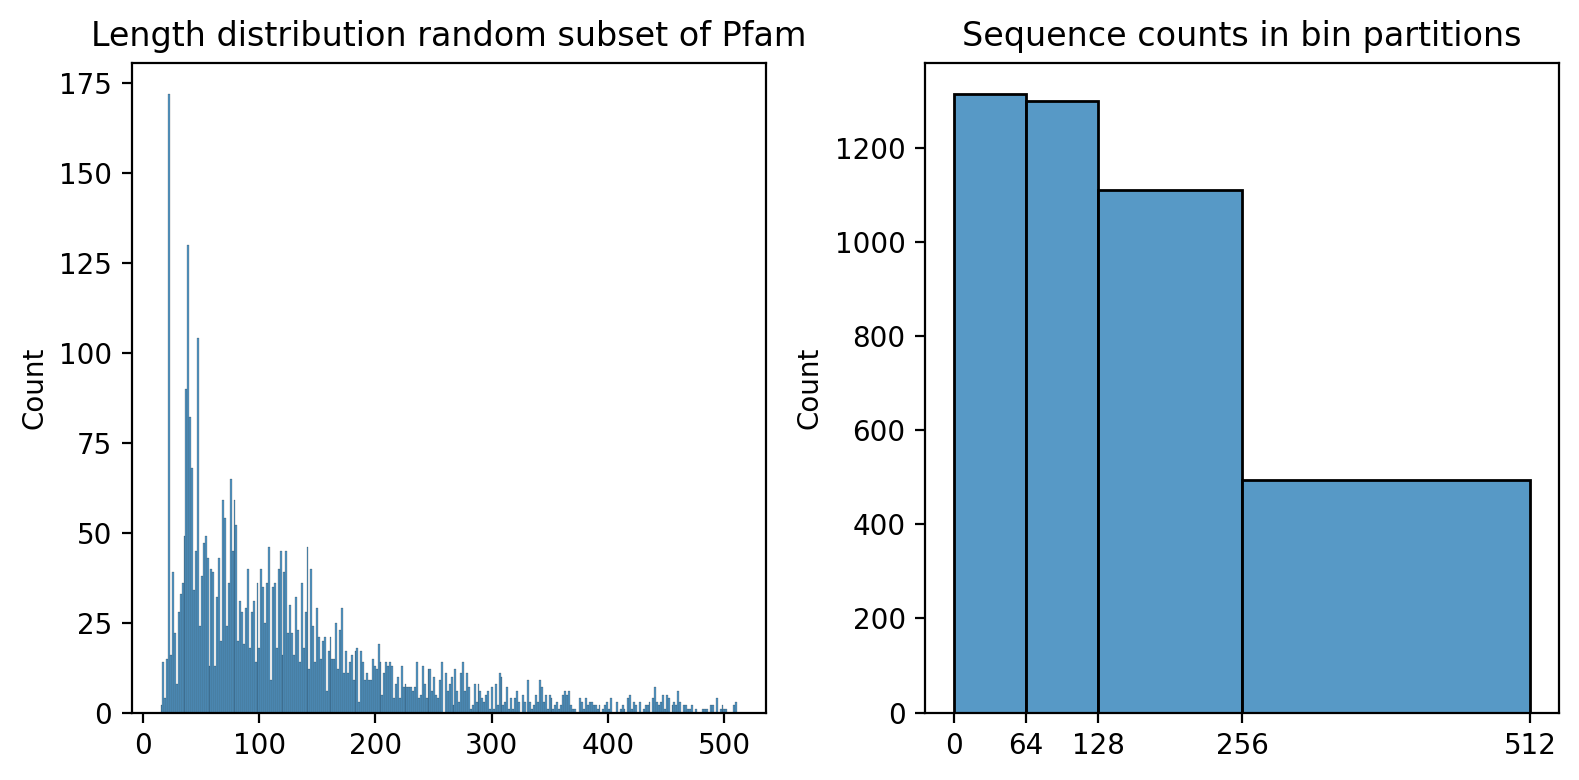

In [73]:
fig,axs = plt.subplots(1,2,figsize=(8,4),dpi=200)
sns.histplot(lengths, bins=300, ax=axs[0])
sns.histplot(lengths, bins=[0,64,128,256,512], ax=axs[1])
axs[0].set_title("Length distribution random subset of Pfam")
axs[1].set_title("Sequence counts in bin partitions")
axs[1].set_xticks([0,64,128,256,512])
plt.tight_layout()

In [46]:
bin1 = []
bin2 = []
bin3 = []
bin4 = []

for s in sequences:
    if len(s) < 64:
        bin1.append(s)
    elif 64 <= len(s) < 128:
        bin2.append(s)
    elif 128 <= len(s) < 256:
        bin3.append(s)
    elif 256 <= len(s) < 512:
        bin4.append(s)
    else:
        print("skipping sequence with length", len(s))

In [50]:
from plaid.utils import write_to_fasta
from pathlib import Path

root_out_dir = Path("/data/lux70/plaid/artifacts/natural")

write_to_fasta(bin1, root_out_dir / "maxlen64" / "generated" / "sequences.fasta")

Wrote 1315 sequences to /data/lux70/plaid/artifacts/natural/maxlen64/sequences.fasta.


In [51]:
# write_to_fasta(bin2, root_out_dir / "maxlen128" / "sequences.fasta")
# write_to_fasta(bin3, root_out_dir / "maxlen256" / "sequences.fasta")
# write_to_fasta(bin4, root_out_dir / "maxlen512" / "sequences.fasta")

Wrote 1300 sequences to /data/lux70/plaid/artifacts/natural/maxlen128/sequences.fasta.
Wrote 1111 sequences to /data/lux70/plaid/artifacts/natural/maxlen256/sequences.fasta.
Wrote 494 sequences to /data/lux70/plaid/artifacts/natural/maxlen512/sequences.fasta.
